In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Path to the uploaded CSV files
path = "./"
all_files = glob.glob(path + "regional-hu-weekly-*.csv")

# Function to extract date from filename
def extract_date(filename):
    base = os.path.basename(filename)
    date_str = base.split('-')[-1].replace('.csv', '')
    return pd.to_datetime(date_str)

# Read and concatenate all files with date as an additional column
df_list = []
for file in all_files:
    df = pd.read_csv(file)
    df['Date'] = file[21:31]
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True)

combined_df


,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03
1,2,spotify:track:0E9ZjEAyAwOXZ7wJC0PD33,"Dynoro, Gigi D'Agostino",In My Mind,Columbia/B1 Recordings,1,34,27,58877,2019-01-03
2,3,spotify:track:5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,Capitol Records,3,38,13,51663,2019-01-03
3,4,spotify:track:2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",Republic Records,1,41,9,48710,2019-01-03
4,5,spotify:track:3KkXRkHbMCARz0aVfEt68P,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,Universal Records,5,48,11,48618,2019-01-03
...,...,...,...,...,...,...,...,...,...,...
57795,196,spotify:track:2glGP8kEfACgJdZ86kWxhN,Lost Frequencies,Are You With Me,Armada Music Albums,177,-1,5,41991,2024-07-11
57796,197,spotify:track:3AjSfp5FDvwtMU9XBsbS8j,Creeds,Push Up - Main Edit,Columbia/B1 Recordings,94,200,57,41989,2024-07-11
57797,198,spotify:track:0YThXX1dqUpYBLyJNAsF9N,Yeat,If We Being Rëal,Field Trip Recordings/Capitol Records,77,190,12,41847,2024-07-11
57798,199,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,-1,86,41592,2024-07-11


In [2]:
combined_df.groupby("track_name")["streams"].sum().sort_values(ascending = False).head(10)

track_name
Mind1               18776277
introvertált dal    18339941
BAGIRA              17944948
four moods          16108260
Pullup              15578382
Lej                 14339330
Blinding Lights     13845127
Olyan Ő             13545644
Rampapapam          13412320
3korty              13161509
Name: streams, dtype: int64

In [3]:
combined_df.pivot_table(index = "track_name", columns = "Date", values = "streams").fillna(0).transpose().reset_index()

track_name,Date,"""Haza akarok menni"" Outro","""Nem érek haza"" Intro","""Slut!"" (Taylor's Version) (From The Vault)","""Soha"" Interlude",#tevagya,(It Goes Like) Nanana - Edit,"...And to Those I Love, Thanks for Sticking Around",03,"1 step forward, 3 steps back",...,Üres a város,Üres szívek,Üzenetek,ébredezem,útvesztő,Őrült lány,Моя голова винтом,Принцесса,Ратата,≥ LÁNY
0,2019-01-03,0.0,0.0,0.0,0.0,22642.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-10,0.0,0.0,0.0,0.0,20051.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-17,0.0,0.0,0.0,0.0,18013.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-24,0.0,0.0,0.0,0.0,16372.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-31,0.0,0.0,0.0,0.0,14280.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2024-06-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,2024-06-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,2024-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,2024-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
combined_df.pivot_table(index = "track_name", columns = "Date", values = "streams").fillna(0).transpose().reset_index()[["Date", "7 rings"]]

track_name,Date,7 rings
0,2019-01-03,0.0
1,2019-01-10,0.0
2,2019-01-17,0.0
3,2019-01-24,161328.0
4,2019-01-31,137043.0
...,...,...
284,2024-06-13,0.0
285,2024-06-20,0.0
286,2024-06-27,0.0
287,2024-07-04,0.0


Text(0.5, 1.0, '7 rings')

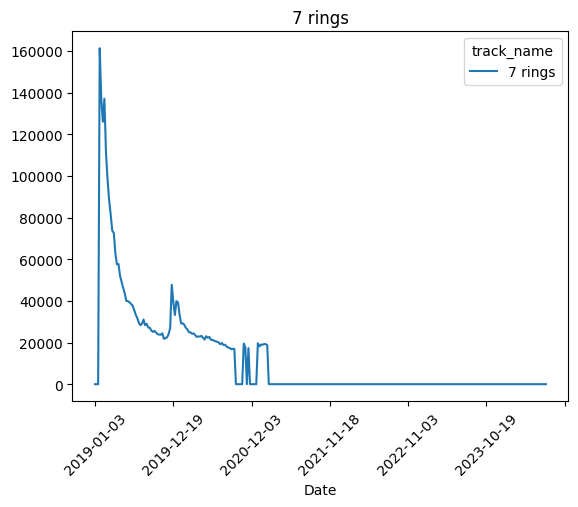

In [5]:
combined_df.pivot_table(index = "track_name", columns = "Date", values = "streams").fillna(0).transpose().reset_index()[["Date", "7 rings"]].plot(x = "Date")
plt.xticks(rotation = 45)
plt.title("7 rings")

Text(0.5, 1.0, 'Blinding Lights')

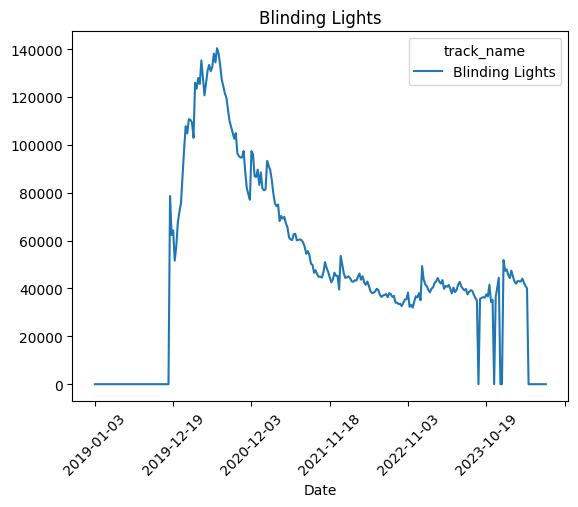

In [6]:
combined_df.pivot_table(index = "track_name", columns = "Date", values = "streams").fillna(0).transpose().reset_index()[["Date", "Blinding Lights"]].plot(x = "Date")
plt.xticks(rotation = 45)
plt.title("Blinding Lights")

Text(0.5, 1.0, 'bury a friend')

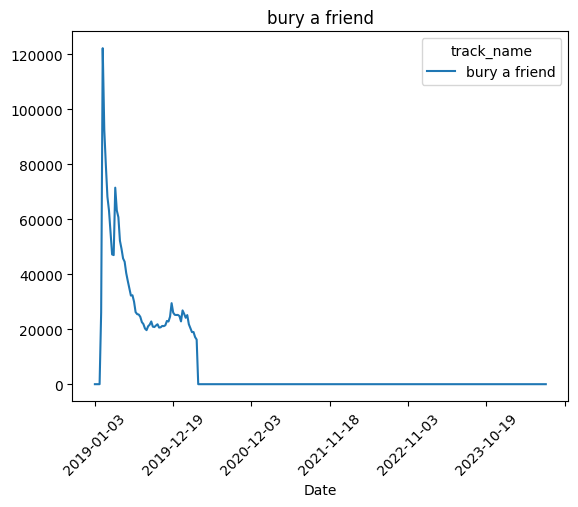

In [7]:
combined_df.pivot_table(index = "track_name", columns = "Date", values = "streams").fillna(0).transpose().reset_index()[["Date", "bury a friend"]].plot(x = "Date")
plt.xticks(rotation = 45)
plt.title("bury a friend")

Text(0.5, 1.0, 'In My Mind')

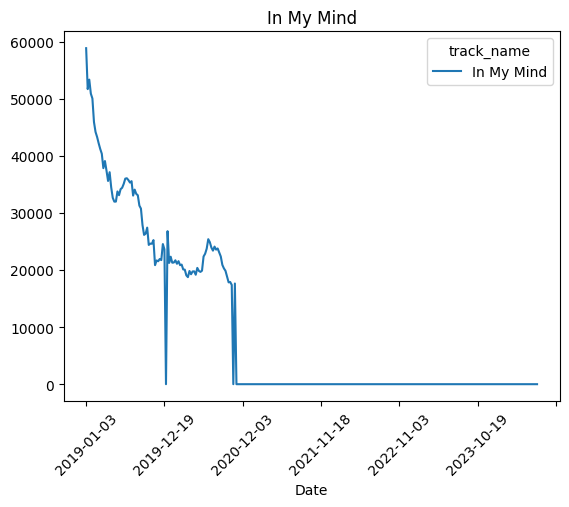

In [8]:
combined_df.pivot_table(index = "track_name", columns = "Date", values = "streams").fillna(0).transpose().reset_index()[["Date", "In My Mind"]].plot(x = "Date")
plt.xticks(rotation = 45)
plt.title("In My Mind")

There are weeks where In My Mind has a value of 0 but actually it wasn't 0, it was just below the 200th track's stream number. <br>
However, we should only take those values into account where the stream number is greater than 0.

In [9]:
def track_time_series(track):
    combined_df.pivot_table(index = "track_name", columns = "Date", values = "streams").fillna(0).transpose().reset_index()[["Date", track]].plot(x = "Date")
    plt.xticks(rotation = 45)
    plt.ylabel("Streams")
    plt.title(track)
    plt.show()

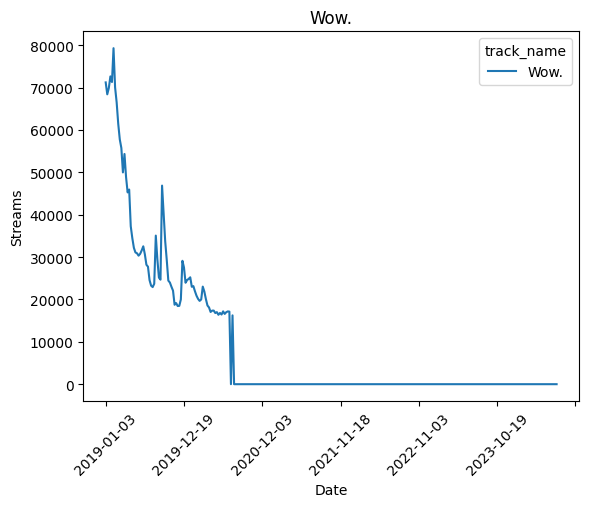

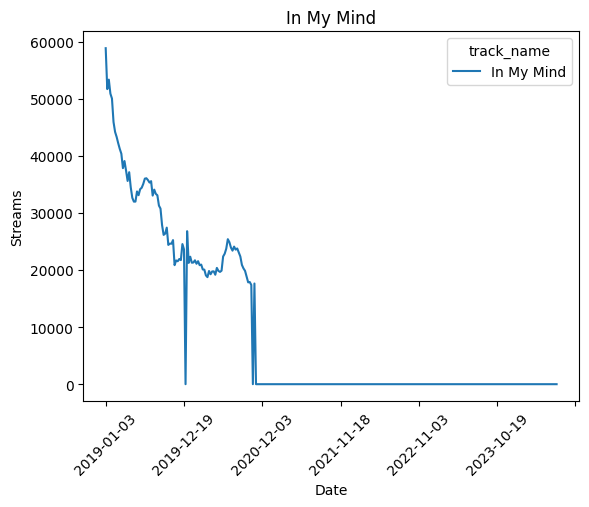

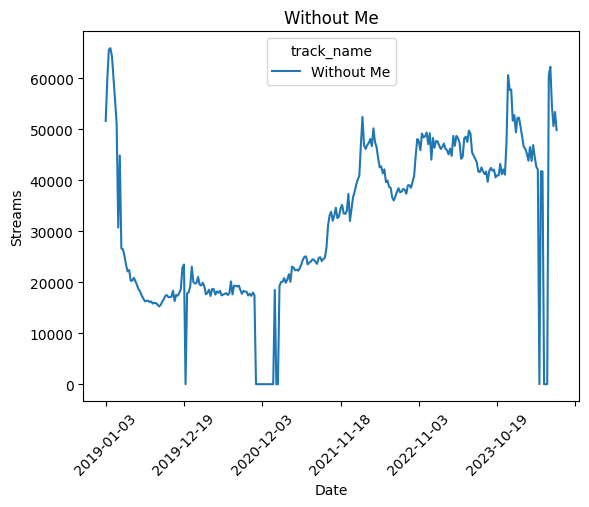

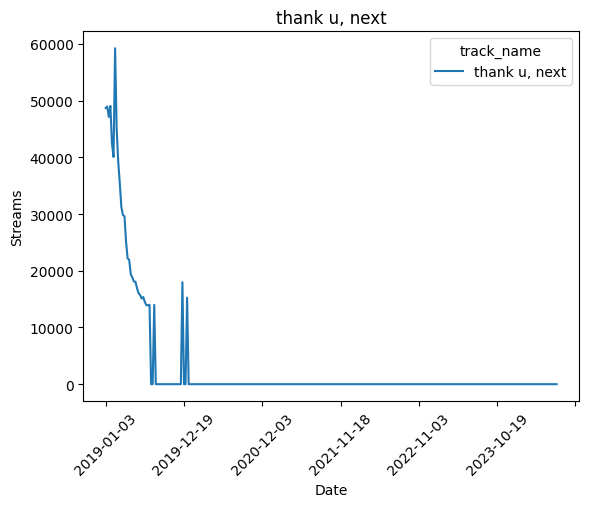

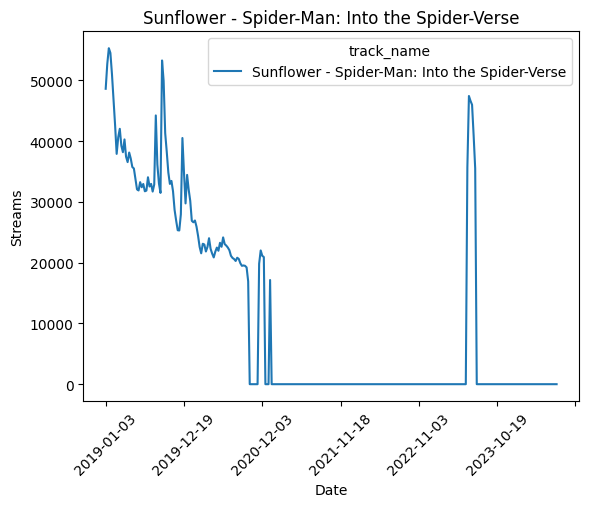

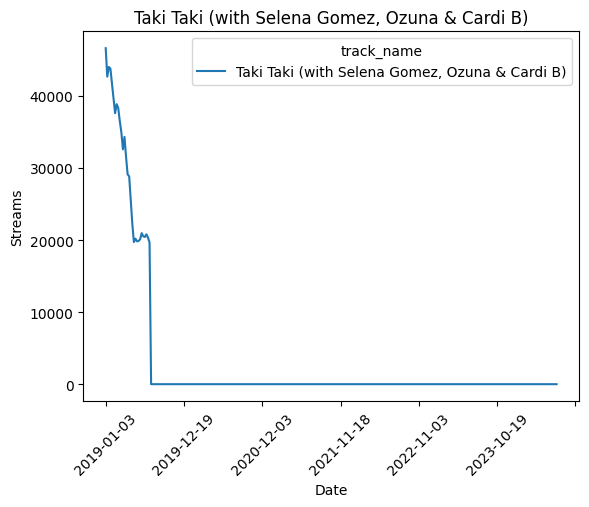

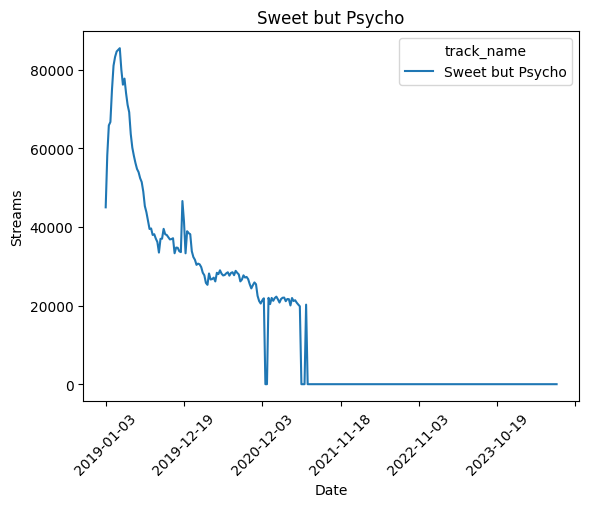

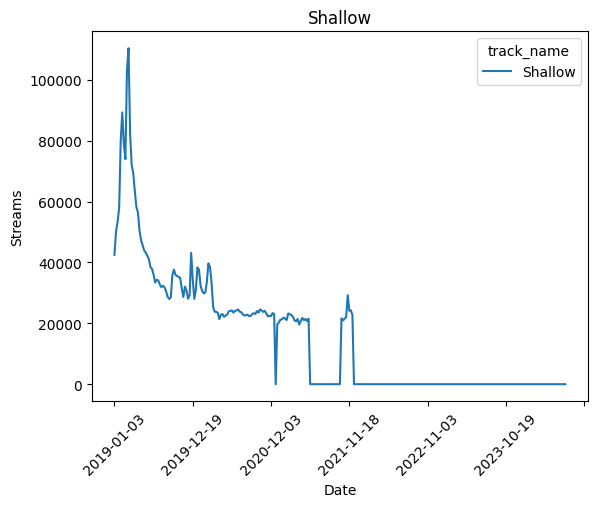

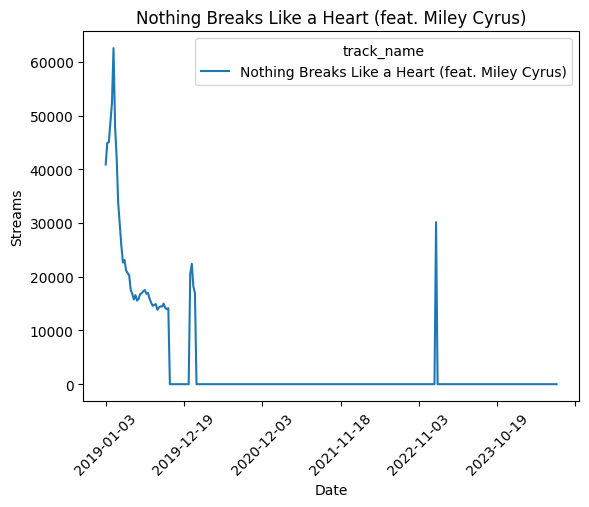

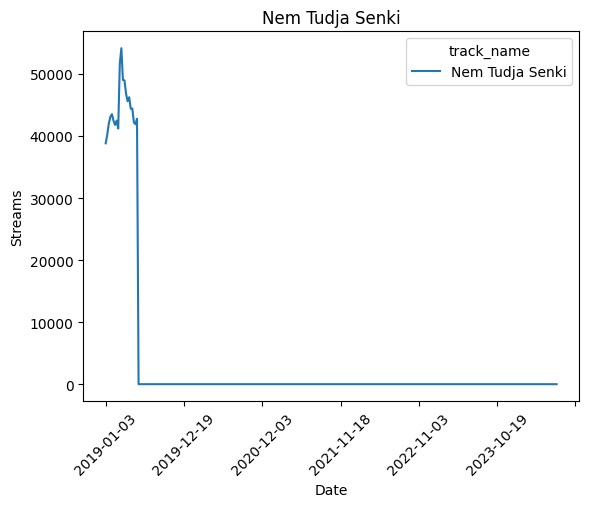

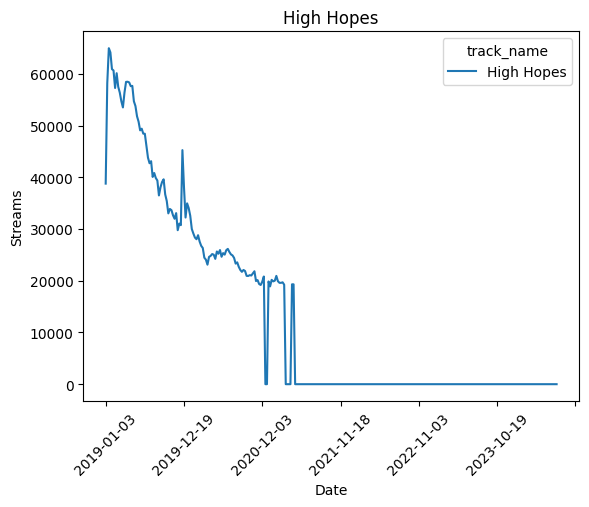

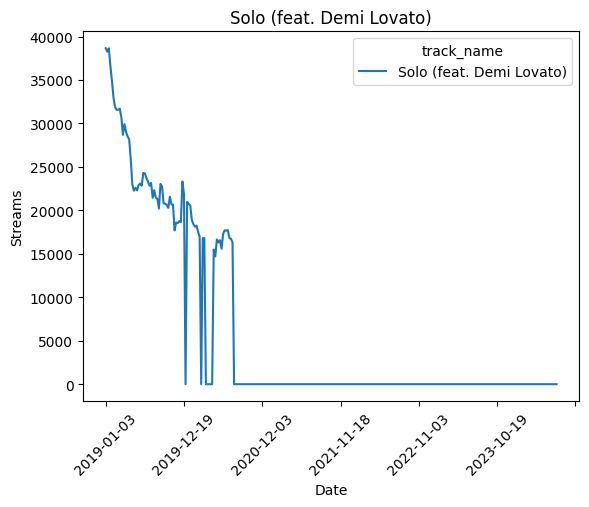

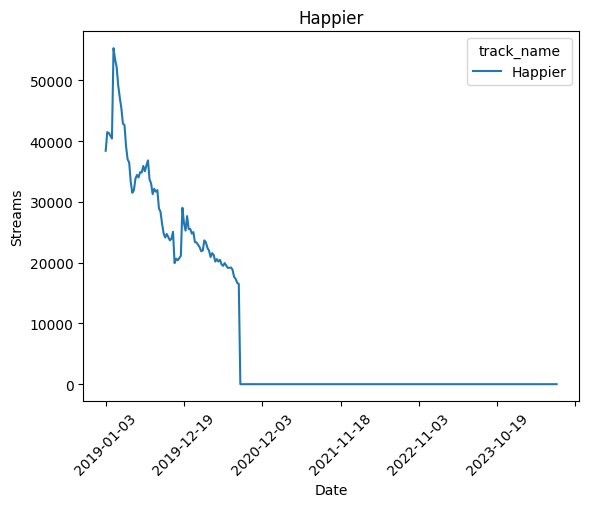

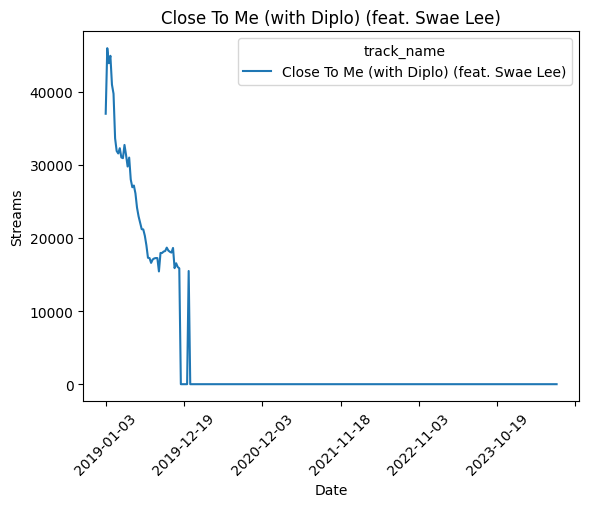

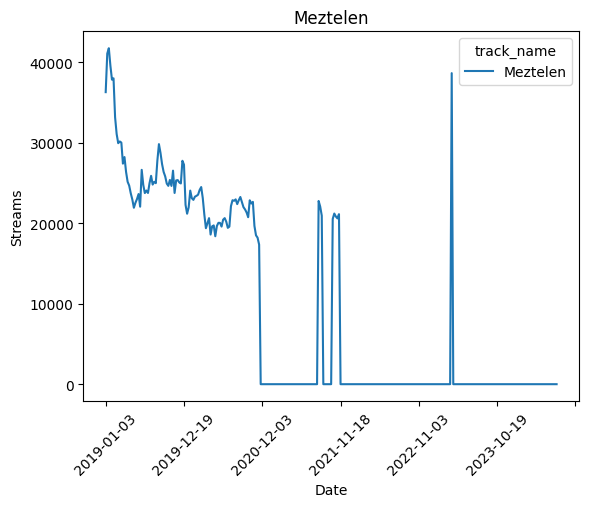

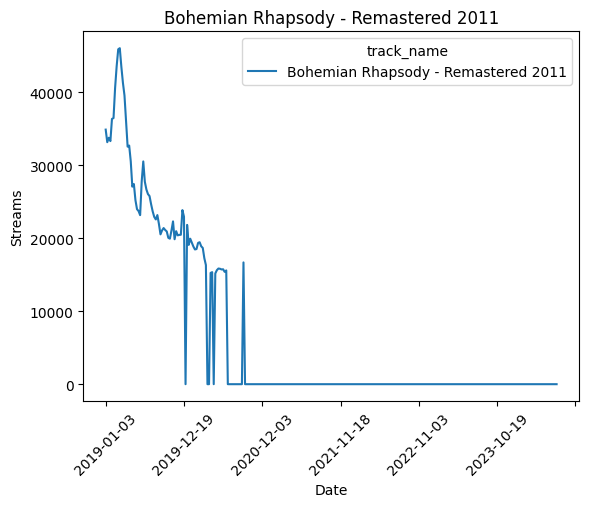

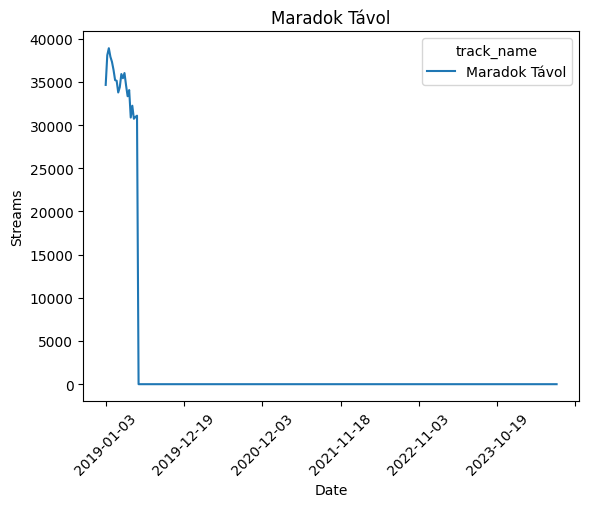

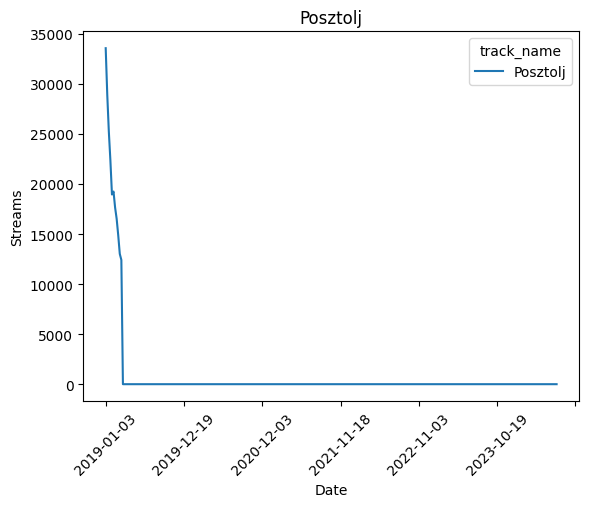

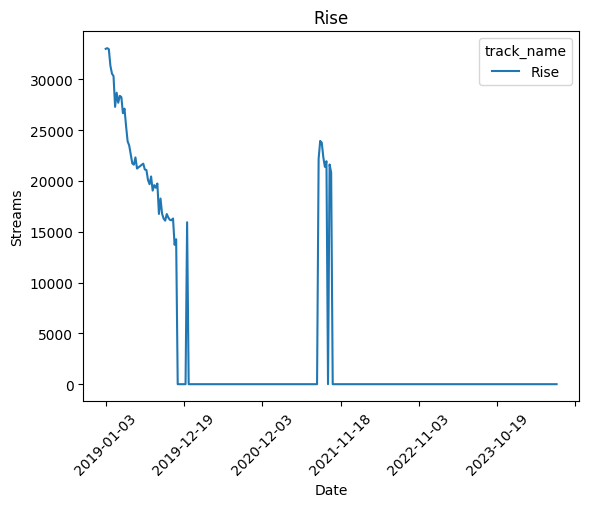

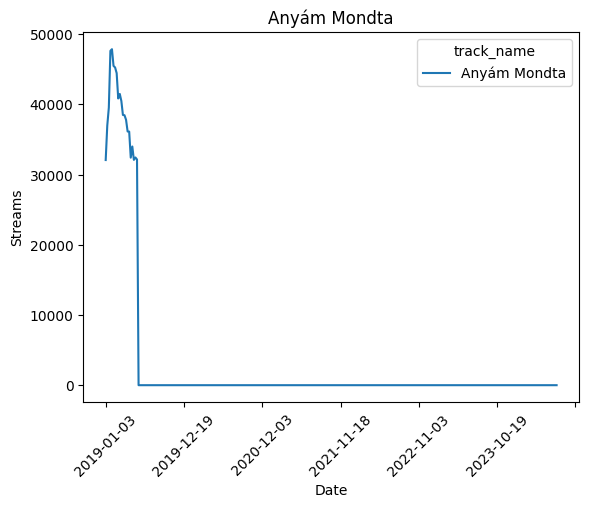

In [10]:
i = 0
for track in combined_df["track_name"].unique():
    track_time_series(track)
    i += 1
    if i == 20:
        break

Text(0.5, 1.0, 'Occurence counts')

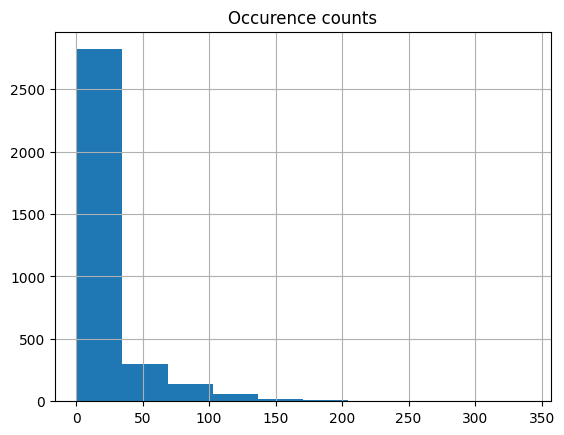

In [11]:
count_of_instances = combined_df.groupby("track_name")["streams"].count().sort_values()
count_of_instances.hist()
plt.title("Occurence counts")

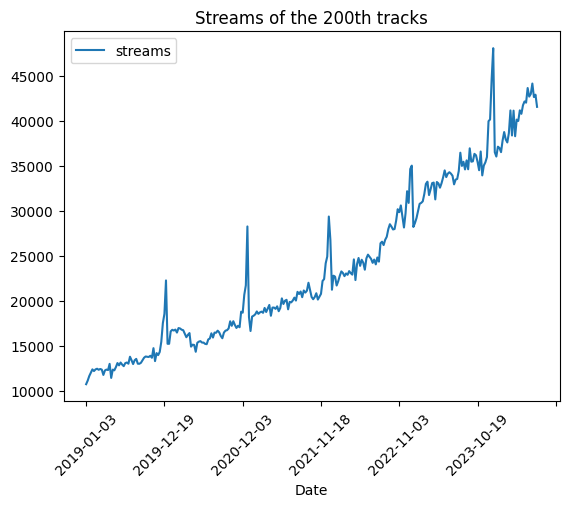

In [12]:
last_tracks = combined_df[combined_df["rank"] == 200]
last_tracks.plot(x = "Date", y = "streams")
plt.xticks(rotation = 45)
plt.title("Streams of the 200th tracks")
plt.show()

The stream numbers of the 200th ranked songs increase in time because of the increasing number of Spotify users and/or the users spend more time on Spotify.

<Axes: xlabel='rank'>

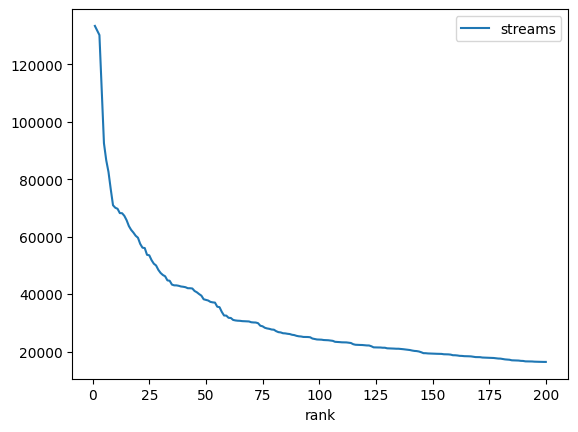

In [13]:
combined_df[combined_df["Date"] == "2020-07-16"].plot(x = "rank", y = "streams")

We should use an exponential decay function to model those tracks that don't make it to the top 200 but their stream number is certainly not 0. <br>
Something like this could work: streams(r) = streams(1) * exp(-k*(r-1)) <br>
where r is the rank, streams(1) is the stream count of the top-ranked song and k is the decay constant. <br>
Or we could also use some kind of model that fits the data and predicts the streams for the 201st track.

In [14]:
avg_top_10 = combined_df.groupby("track_name")["streams"].mean().sort_values(ascending = False).head(10)
avg_top_10

track_name
BAKPAKK                       350488.000000
Strawberry                    320848.545455
Voodoo Baba                   318485.666667
SZÍVTIPRÓ                     287631.000000
i like the way you kiss me    280147.647059
Rampapapam                    262986.666667
introvertált dal              251232.068493
Tiara                         233458.476190
Úgy Hiszem                    228747.043478
3korty                        208912.841270
Name: streams, dtype: float64

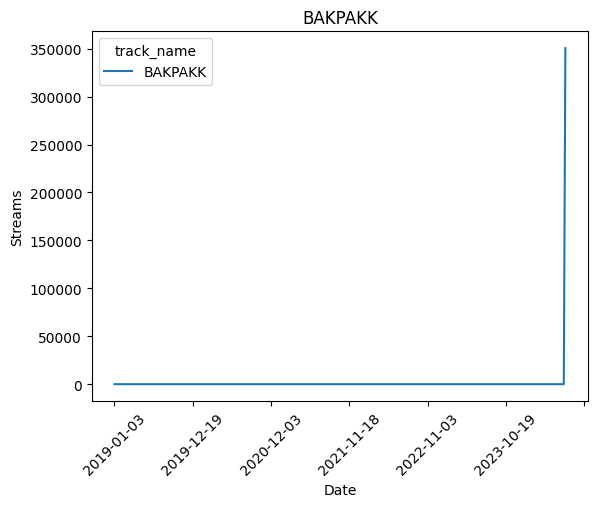

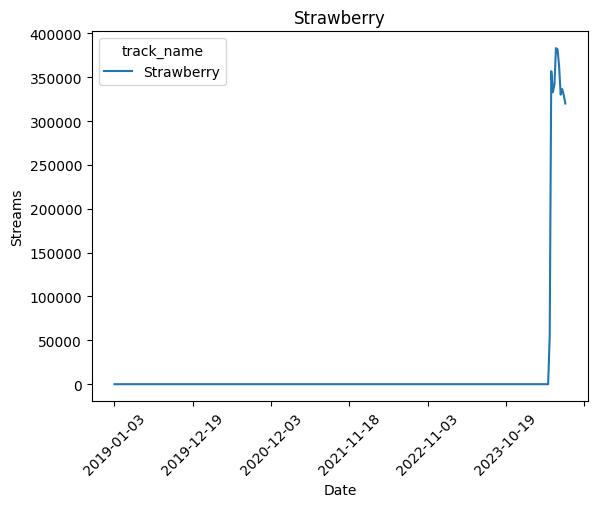

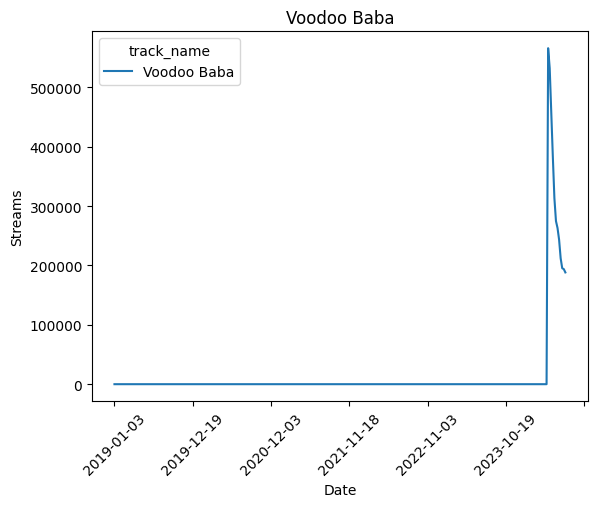

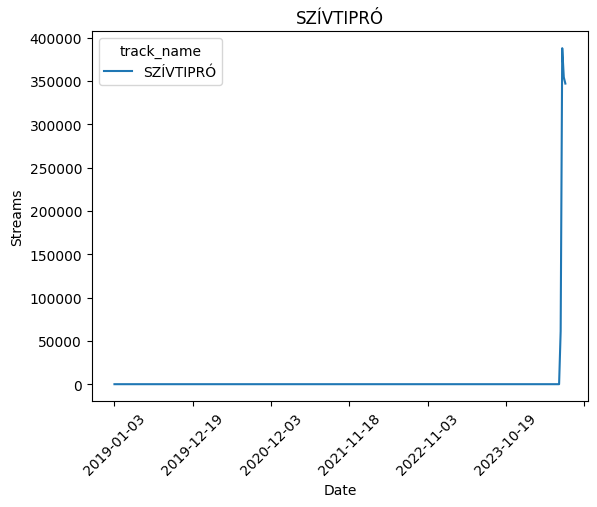

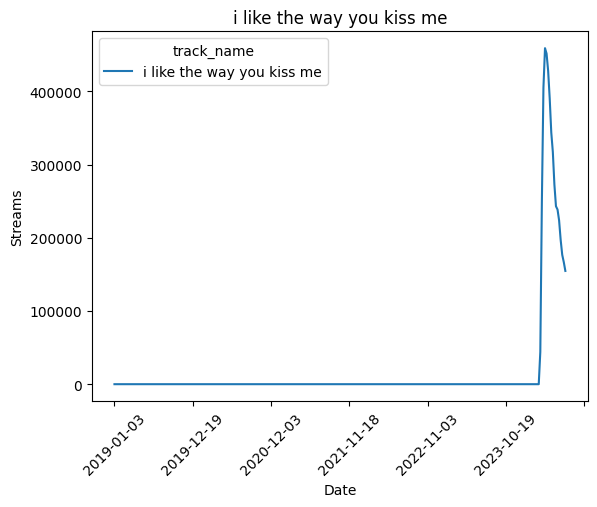

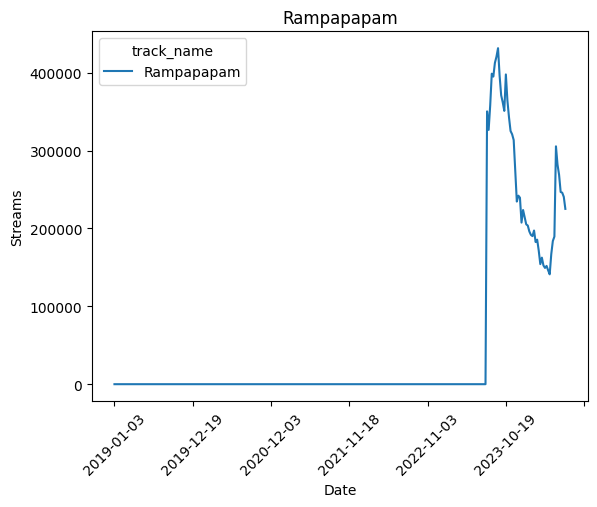

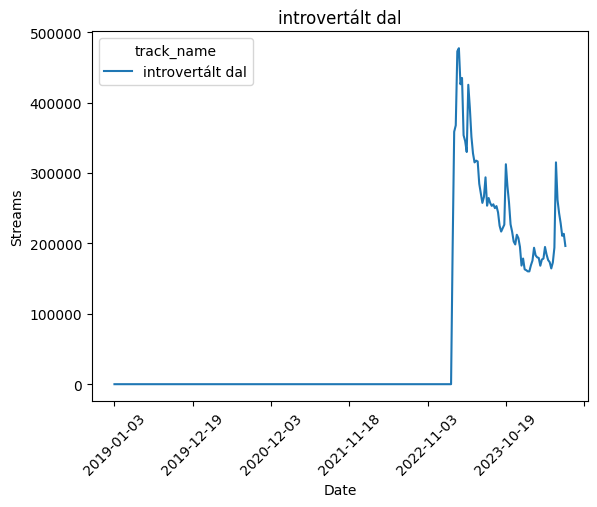

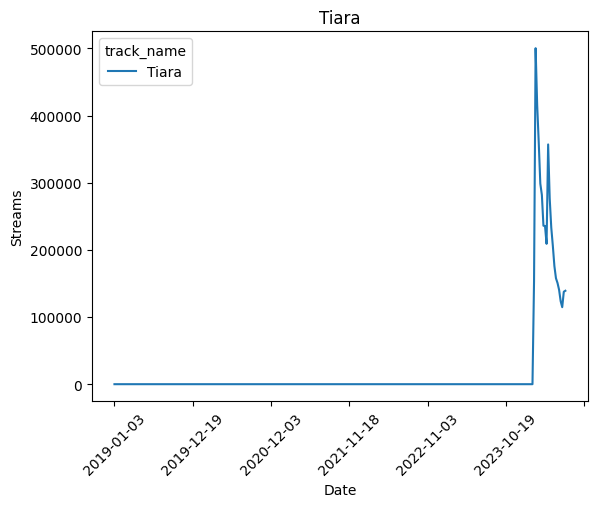

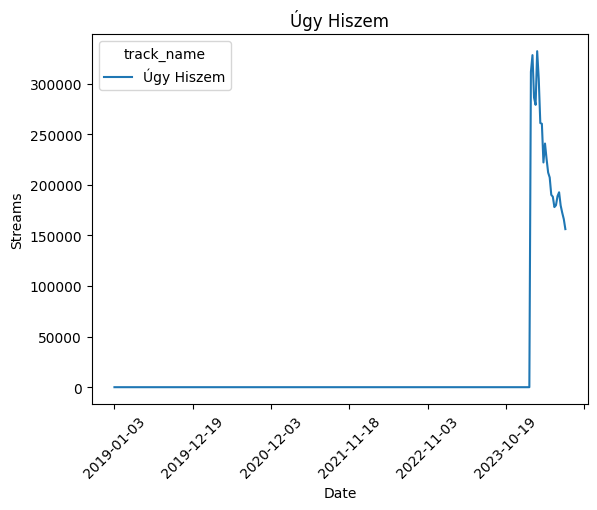

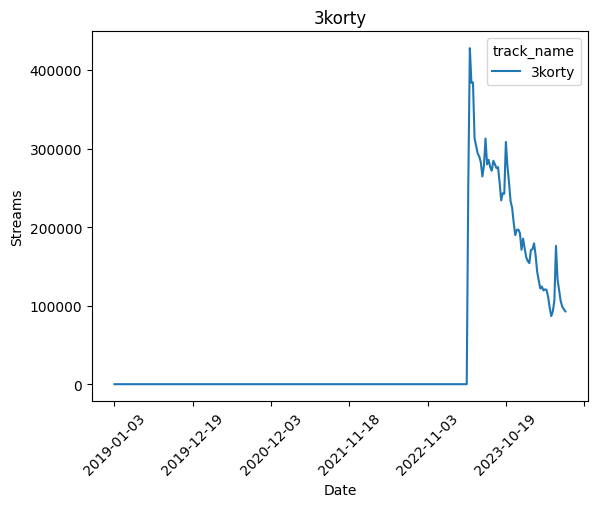

In [15]:
for track in avg_top_10.index:
    track_time_series(track)

In [16]:
len(combined_df[combined_df["track_name"] == "Bad Habits"])

85

In [17]:
len(combined_df["track_name"].unique())

3342

In [18]:
count_of_instances_df = pd.DataFrame(count_of_instances).reset_index()
tracks_to_use1 = count_of_instances_df[count_of_instances_df["streams"] > 1]["track_name"].values
tracks_to_use2 = count_of_instances_df[count_of_instances_df["streams"] > 2]["track_name"].values
tracks_to_use3 = count_of_instances_df[count_of_instances_df["streams"] > 3]["track_name"].values
tracks_to_use4 = count_of_instances_df[count_of_instances_df["streams"] > 4]["track_name"].values
tracks_to_use5 = count_of_instances_df[count_of_instances_df["streams"] > 5]["track_name"].values
tracks_to_use6 = count_of_instances_df[count_of_instances_df["streams"] > 6]["track_name"].values
tracks_to_use1

array(['filter', 'original me (feat. dan reynolds of imagine dragons)',
       'mariana.árok - slowed + reverb', ..., 'Lej', 'Olyan Ő',
       'Without Me'], dtype=object)

In [19]:
len(tracks_to_use1), len(tracks_to_use2), len(tracks_to_use3), len(tracks_to_use4), len(tracks_to_use5), len(tracks_to_use6)

(2391, 2092, 1890, 1723, 1586, 1488)

In [20]:
combined_df[combined_df["track_name"].isin(tracks_to_use3)].groupby("track_name")["streams"].mean().sort_values(ascending = False).head(10)

track_name
Strawberry                    320848.545455
Voodoo Baba                   318485.666667
SZÍVTIPRÓ                     287631.000000
i like the way you kiss me    280147.647059
Rampapapam                    262986.666667
introvertált dal              251232.068493
Tiara                         233458.476190
Úgy Hiszem                    228747.043478
3korty                        208912.841270
Pedro                         199255.571429
Name: streams, dtype: float64

# Popularity inspection

In [21]:
count_of_instances_df = pd.DataFrame(count_of_instances).reset_index()
tracks_to_use = count_of_instances_df[count_of_instances_df["streams"] > 3]["track_name"].values

In [22]:
combined_df2 = combined_df[combined_df["track_name"].isin(tracks_to_use)]
combined_df2

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date
0,1,spotify:track:6MWtB6iiXyIwun0YzU6DFP,Post Malone,Wow.,Republic Records,1,132,2,71251,2019-01-03
1,2,spotify:track:0E9ZjEAyAwOXZ7wJC0PD33,"Dynoro, Gigi D'Agostino",In My Mind,Columbia/B1 Recordings,1,34,27,58877,2019-01-03
2,3,spotify:track:5p7ujcrUXASCNwRaWNHR1C,Halsey,Without Me,Capitol Records,3,38,13,51663,2019-01-03
3,4,spotify:track:2rPE9A1vEgShuZxxzR2tZH,Ariana Grande,"thank u, next",Republic Records,1,41,9,48710,2019-01-03
4,5,spotify:track:3KkXRkHbMCARz0aVfEt68P,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,Universal Records,5,48,11,48618,2019-01-03
...,...,...,...,...,...,...,...,...,...,...
57795,196,spotify:track:2glGP8kEfACgJdZ86kWxhN,Lost Frequencies,Are You With Me,Armada Music Albums,177,-1,5,41991,2024-07-11
57796,197,spotify:track:3AjSfp5FDvwtMU9XBsbS8j,Creeds,Push Up - Main Edit,Columbia/B1 Recordings,94,200,57,41989,2024-07-11
57797,198,spotify:track:0YThXX1dqUpYBLyJNAsF9N,Yeat,If We Being Rëal,Field Trip Recordings/Capitol Records,77,190,12,41847,2024-07-11
57798,199,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,-1,86,41592,2024-07-11


In [23]:
combined_df2[combined_df2["track_name"] == "Time of Our Lives"]

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date
57185,186,spotify:track:2bJvI42r8EF3wxjOuDav4r,"Pitbull, Ne-Yo",Time of Our Lives,Mr.305/Polo Grounds Music/RCA Records,186,-1,1,46394,2024-06-20
57363,164,spotify:track:2bJvI42r8EF3wxjOuDav4r,"Pitbull, Ne-Yo",Time of Our Lives,Mr.305/Polo Grounds Music/RCA Records,164,186,2,47763,2024-06-27
57594,195,spotify:track:2bJvI42r8EF3wxjOuDav4r,"Pitbull, Ne-Yo",Time of Our Lives,Mr.305/Polo Grounds Music/RCA Records,164,164,3,43400,2024-07-04
57799,200,spotify:track:2bJvI42r8EF3wxjOuDav4r,"Pitbull, Ne-Yo",Time of Our Lives,Mr.305/Polo Grounds Music/RCA Records,164,195,4,41572,2024-07-11


In [24]:
combined_df2[combined_df2["track_name"] == "téveszmék"]

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,Date
37647,48,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,48,-1,1,56220,2022-08-11
37805,6,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,6,48,2,161746,2022-08-18
38004,5,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,6,3,210829,2022-08-25
38206,7,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,5,4,178343,2022-09-01
38408,9,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,7,5,146497,2022-09-08
...,...,...,...,...,...,...,...,...,...,...
56702,103,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,61,82,61999,2024-06-06
56932,133,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,103,83,54638,2024-06-13
57159,160,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,133,84,50214,2024-06-20
57386,187,spotify:track:5T7eEaieasnflXh6iPLlrK,Azahriah,téveszmék,Supermanagement,5,160,85,44243,2024-06-27


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from datetime import datetime
import numpy as np

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="2f810920c9ae4726bdc40385bc3aa33c",
                                                           client_secret="8696d8d9bf3443f4ba039dd7f6abad34"))

sp.track("2bJvI42r8EF3wxjOuDav4r")["album"]["release_date"]

In [26]:
date_objects = [datetime.strptime(date, '%Y-%m-%d') for date in combined_df2["Date"].unique()]
dates_np = np.array(date_objects, dtype='datetime64[D]')
dates_np

NameError: name 'np' is not defined

In [ ]:
dates_np[-1]

In [ ]:
import numpy as np

# The date to search for
search_date = np.datetime64('2014-11-21')

# Find the index of the first date that is greater than or equal to the search date
index = np.searchsorted(dates_np, search_date, side='left')

# Check if the index is within bounds and print the result
if index < len(dates_np):
    result_date = dates_np[index]
    print(f"The date in the array that is greater than or equal to {search_date} is {result_date}.")
else:
    print(f"No date found in the array that is greater than or equal to {search_date}.")


In [74]:
def get_week(search_date):
    index = np.searchsorted(dates_np, search_date, side='left')
    if index < len(dates_np):
        result_date = dates_np[index]
    else:
        result_date = dates_np[-1]
    return result_date

In [81]:
get_week(np.datetime64('2024-07-04'))

numpy.datetime64('2024-07-04')

In [ ]:
release_dates = []
for lab, row in combined_df2.iterrows():
    id = row["uri"].split(":")[-1]
    date = sp.track(id)["album"]["release_date"]
    print(date)

2018-12-24
2018-06-08
2018-10-04
2018-11-03
2018-12-14
2018-09-28
2018-08-17
2018-10-05
2018-11-30
2018-04-19
2018-06-22
2018-11-30
2018-08-17
2018-10-24
2018-12-15
1975-11-21
2018-09-01
2018-11-17
2018-11-09
2018-11-26
2018-04-27
2018-12-20
2018-04-27
2018-12-14
2018-06-15
2018-11-09
2018-07-30
2018-11-30
2018-08-17
2018-09-14
2018-06-15
2018-12-07
2018-04-06
2018-08-03
2018-10-17
2018-12-08
2018-12-20
2018-04-06
2018-02-09
2018-05-18
2018-10-25
1980-06-27
2018-12-14
2018-10-26
2017-06-23
2018-11-09
2018-11-23
2018-12-10
2018-03-16
2018-05-18
2017-06-30
2018-01-12
2015
2018-12-01
2017-07-28
2017-10-27
1978-11-10
2017-03-03
2018-10-18
2018-06-29
2017-05-29
2017-06-23
2018-01-19
2018-05-10
2018-08-17
2017-06-02
2017-08-10
2015
2018-12-07
2018-10-18
2018-04-27
2018-12-20
2018-08-31
2018-01-23
2018-12-20
2018-12-21
2018-12-14
2018-08-01
2018-06-22
2018-03-16
2018-02-09
2018-10-10
2018-12-20
2018-12-07
1982-05-03
2017-08-11
2018-06-22
2018-06-29
2018-10-05
2018-05-16
2018-10-18
2017-06-16


In [ ]:
combined_df2["uri"].unique()

In [84]:
combined_df2.iloc[1]["uri"].split(":")[-1]

'0E9ZjEAyAwOXZ7wJC0PD33'